<a href="https://colab.research.google.com/github/TacticalCoders/machine-learning/blob/main/Perch_Length_Weight3(Length_Height_Width).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **다중 회귀(multiple regression)**

다항 회귀로 농어의 무게를 어느 정도 예측할 수 있었지만 여전히 훈련 세트보다 테스트 세트의 점수가 높다.(과소적합)

전 모델에서는 하나의 특성(길이)만 사용하여 선형 회귀 모델을 훈련시켰다.
이와 달리 **여러 개의 특성을 사용한 선형 회귀**를 **다중 회귀(multiple regression)**

1개의 특성을 사용했을 때 성형 회귀 모델이 학습하는 것은 직선이다. 

그럼 2개의 특성을 사용하면?

특성이 2개면 선형 회귀는 **평면을 학습**한다. '타킷 = a * 특성1 + b * 특성2 + 절편'

특성이 3개면?

슬프지만 인간은 3차원 공간 이상을 그리거나 상상할 수 없다. 하지만 행렬을 통해 가중치를 구하는 것은 가능하다.

### 특성 공학(feature engineering)

이제 농어의 길이뿐만 아니라 농어의 높이와 두께도 함께 사용할 것이다. 또 이전 모델에서 처럼 3개의 특성을 각각 제곱하여 추가할 것이다. (각각 2차식으로 만들기)

거기다가 '길이x높이'를 새로운 특성으로 만들 것이다.
이처럼 **기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 특성 공학(feature engineering)**이라고 부른다.

### 데이터 준비하기

특성이 3개이기 때문에 데이터를 입력하기 번거롭다.

이렇게 대량의 데이터를 처리할 때는 따로 데이터를 다운받아 사용한다. 하지만 넘파이에서는 이런 작업을 잘 지원하지 않는다.



#### 판다스(pandas)

판다스는 유명한 데이터 분석 라이브러리다. 

**데이터프레임(dataframe)은 판다스의 핵심 데이터 구조**로 넘파이 배열과 마찬가지로 다차원 배열을 다룰 수 있고 더 많은 기능을 제공한다.

판다스를 사용해 농어 데이터를 다운받아 데이터 프레임에 저장하고 넘파이 배열로 변환해 선형 회귀 모델을 훈련해보자.

In [2]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy() # 넘파이 배열로 변환
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

길이, 높이, 너비 순이다.

In [3]:
# 타깃 데이터(무게)는 이전과 동일한 방식으로 준비

import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [12]:
# 훈련 세트와 테스트 세트 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split( perch_full, perch_weight, random_state=42)

### 데이터 변환하기

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다. 이런 클래스를 변환기(transformer)라고 부른다.

여기서 사용한 변환기는 **PolynomialFeatures** 클래스이다.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# PolynomialFeatures 사용법 알아보기

poly = PolynomialFeatures()
poly.fit([[2,3]]) 
print(poly.transform([[2,3]])) # 먼저 훈련을 해야 변환이 가능하다.

[[1. 2. 3. 4. 6. 9.]]


2개의 특성을 가진 샘플이 6개의 특성을 가진 샘플로 바뀌었다.

PolynomialFeatures는 기본적으로 
1. 각 특성을 제곱한 항
2. 특성끼리 곱한 항을 추가한다.

따라서 2와 3을 각각 제곱한 4와 9, 2와 3을 곱한 6이 추가되었다. 그런데 1은 무엇인가?

다음과 같은 성형 방정식이 있다고 해보자.

**무게 = aX길이 + bX높이 + cX두께 + dX1(절편)**

즉 절편은 상수항인데, 상수항에는 항상 1이 들어가는 것과 같다. 즉 특성이 (길이, 높이, 두께, 1)이 되는 것이다.

하지만 사실상 1은 필요가 없다. 그래서 1을 제거하여 특성을 다시 만들어주자.

include_bias = False 로 지정하여 특성을 변환해보자.




In [8]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


이제 실제로 train_input을 변환해보자.

In [13]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


3개의 특성을 9개로 만들어주었다.

In [14]:
poly.get_feature_names_out() # 어떤 조합으로 특성이 만들어 졌는지 알려주는 메서드

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

이제 테스트 세트도 변환해주자.

In [15]:
test_poly = poly.transform(test_input)

이제 변환된 특성을 사용하여 다중 회귀 모델을 훈련하자.

### 다중 회귀 모델 훈련하기

다중 회귀 모델 훈련은 선형 회귀 모델을 훈련하는 것과 같다. 다만 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것이다. 

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


아주 높은 값이 나왔다. 이렇게 농어의 길이뿐만 아니라 높이와 두께, 그리고 각 특성을 제곱하고 곱해서 특성을 추가했더니 매우 정확도 높은 모델이 환성되었다.

테스트 세트에 대한 점수도 확인해보자.

In [18]:
print(lr.score(test_poly, test_target))

0.9714559911594134


과소적합 문제는 더 이상 나타나지 않는다.

### 특성을 더 추가하여 훈련하기

특성이 무조건 많은면 좋은 모델을 만들 수 있을까? 

5제곱까지 특성을 만들어 출력해보자.

In [19]:
poly = PolynomialFeatures(degree=5, include_bias=False) #degree로 최대 차수를 지정.
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


총 55개의 특성이 만들어졌다.

In [20]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


훈련 테스트에서는 매우 높은 점수가 나왔다.

In [21]:
print(lr.score(test_poly, test_target))

-144.40579242684848


음수가 나왔다. 이는 **훈련 세트에 너무 과대적합되었음**을 의미한다. 테스트 세트에서는 형편없는 점수다. 

이를 해결하려면 다시 특성을 줄여야 한다.

### **규제(regularization)**

규제(regularization)는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다. 

즉, 모델이 너무 훈련 세트에 과대적합되지 않도록 만든다.

선형 회귀 모델에서 규제는 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 것이다.

만약 4차, 5차함수라면, 변곡점이 여러개인 그래프가 그려질 것이다. 그 기울기가 크다면 이는 보편적이지 않고 훈련 세트에만 너무 치중된 모델이 만들어지게 된다.

#### 스케일 정규화

앞서 살펴봤듯이 특성의 스케일이 정규화되지 않으면 곱해지는 계수 값도 차이가 나게 된다.

따라서 규제를 하기 전, 정규화를 해야한다. 

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly) # 훈련 세트로 학습한 변환기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly) # 테스트 세트는 꼭 훈련 세트로 학습한 변환기를 사용해 변환해야 한다.

#### **릿지(ridge)회귀**

선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 부른다. 

릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고,

라쏘는 계수의 절댓값을 기준으로 규제를 적용한다. 

일반적으로 릿지를 선호한다.

In [25]:
# 릿지 회귀

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


조금 낮아졌다. 

In [26]:
print(ridge.score(test_scaled, test_target))

0.9790693977615397


테스트 점수가 정상으로 돌아왔다. 즉 과대적합을 해소했다.

많은 특성을 사용하고도 테스트 세트에서도 좋은 성능을 내고 있다.

##### 규제의 양 임의로 조절하기(alpha 값 조절하기)

모델 객체를 만들 때 **alpha** 매개변수로 규제의 강도를 조절할 수 있다.

alpha 값이 크면 규제 강도가 세진다. 따라서 계수 값을 더 줄이고 싶다면(기울기를 더 줄이고 싶다면) alpha 값을 높게 주면된다. 

이렇게 사람이 직접 지정해야하는 매개변수를 **하이퍼파라미터**라고 부른다.

그런데 어떻게 적절한 alpha값을 찾을 수 있을까?

훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpah 값이 된다. 

이를 확인하기 위해 alpha 값 별 score를 그래프로 나타내보자.

In [27]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [28]:
alpha_list = [0.0001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

이제 그래프를 그릴 것에 alpha 값을 10배씩 늘렸기 때문에 그래프 왼쪽이 너무 촘촘해진다.(매우 적은 값) 

따라서 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현한다.

0.001은 -3, 0.01은 -2

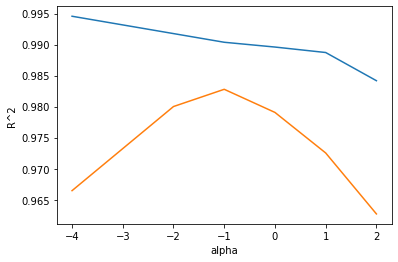

In [29]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

파란색이 훈련세트, 주황색이 테스트 세트이다.

왼쪽은 차이가 아주 크다. 즉 훈련세트에는 아주 잘 맞지만 테스트 세트에서는 형편이 없다.

오른쪽은 훈련 세트, 테스트 세트 모두 점수가 낮아진다. 너무 많이 규제를 했다는 뜻이다.

**적절한 alpha 값은 두 그래프가 가장 가깝고 점수가 높은 -1, 즉 0.1이다.**

In [33]:
ridge =Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


실제로 훈련 세트와 테스트 세트에서 가장 좋은 성능을 보여주고 있다.

#### **라쏘(lasso) 회귀**

In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [35]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


라쏘에서도 적절한 alpha값을 찾아 규제를 최적화하자.

In [36]:
train_score = []
test_score = []
alpha_list = [0.0001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.937e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


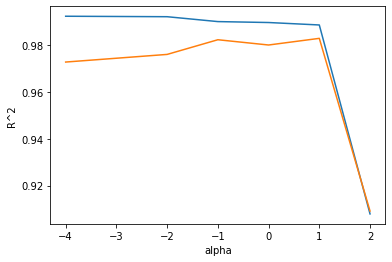

In [37]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

파란색이 훈련세트 그래프, 주황색이 테스트 세트 그래프이다.

1에서 최적의 aplpha 값을 갖는다. 1=10^1 = **10이다.**

In [39]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


라쏘는 모델 계수를 아예 0으로 만들어 버려서 규제를 할 수도 있다. 

얼마나 많은 계수가 0으로 되었는지는 coef_ 속성에서 0인 것을 찾아 확인해볼 수 있다.

In [41]:
print(np.sum(lasso.coef_ == 0))

40


40개의 계수가 0으로 되었다. 즉 우리가 늘린 55개의 특성중 오직 15개만 사용하였다는 것이다.

이처럼 **라소 모델은 유용한 특성을 골라낸는 용도로 사용할 수 있다.**